In [1]:
import pandas as pd
import numpy as np
from my_ml_package.visualize import plot_digit, plot_cosine_distance, plot_line, plot_data_points
from my_ml_package.distance import euclidean_distance, cosine_distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

## Distance Metrics

When would we use Distance Metrics?

The most intuitive one
* Euclidean distance: 
    + Generalization: Minkowski distance (Norm 1: Manhattan distance)
    + but can be problematic


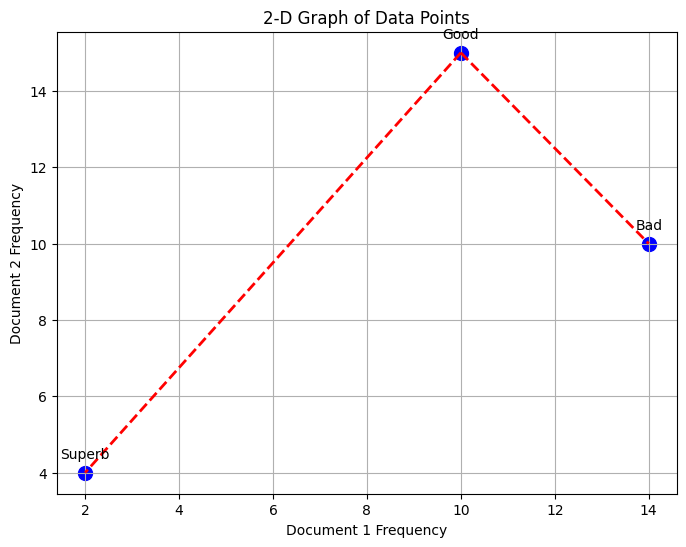

In [2]:


X = np.array([
    [2, 4],  # Superb
    [10, 15],  #  Good
    [14, 10]   # Bad
])
# Considering that "Good"and "Superb" appear less frequently in negative documents and more frequently in positive ones, 
# can you guess what's the meaning of each column?

fig, ax = plot_data_points(X, labels= ['Superb', 'Good', 'Bad'])
plot_line( ax, X, 1, 0)  # from Good to Superb
plot_line( ax, X, 1, 2)  # from Good to Bad
plt.show()




Problem 1: Does not count relativity between variables
* One possible solution: Cosine Distance
* Others?



In [3]:

good = X[1]
superb = X[0]
bad = X[2]

def cosine_distance(x, y):
    return 1- np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

print(cosine_distance(good, superb))
print(cosine_distance(good, bad))

0.007722123286332483


In [ ]:
X = np.array([
    [2, 4],  # Superb
    [10, 15],  #  Good
    [14, 10]   # Bad
])

fig, ax = plot_data_points(X, labels= ['Superb', 'Good', 'Bad'])
plot_cosine_distance( ax, X, 1, 0)   # from Good to Superb
plot_cosine_distance( ax, X, 1, 2)  # from Good to Bad
plt.show()

Other distance metric:
* Jaccard distance
* Manhattan distance


<!-- To devise a clustering methods, we need to 
* Step 1: define a distance metric between objects $d(x_1, x_2)$
* Step 2: define an objective function (clustering goal)
* Step 3: optimize the objective function by updating parameters -->

When do we need distance metrics?

## K means
The scikit-learn API requies that:
* The data is represented by NumPy array or pandas DataFrame with features in columns and observations in rows.
* The features take on continuous values as opposed to the categories.
* No missing values


In [ ]:
# People data with Height cm, Weight kg
X = np.array([
    [175, 75],  # Adult    1
    [60, 5],    # Baby     
    [50, 4],    # Baby     1
    [70, 7],    # Baby     
    [180, 80],  # Adult    1
    [178, 72],  # Adult (new) 1
    [172, 70],  # Adult (new)  
    [169, 74],  # Adult (new)  
    [55, 6],    # Baby (new)  
    [65, 8]     # Baby (new)  1
])

# True labels
y = ['A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B']

## Generate synthetic dataset with 8 random clusters
model = KMeans(n_clusters=2)
model.fit(X)
y_pred = model.predict(X)

print(y_pred)

* Steps
  * Initialization 
  * -> Assignment 
  * -> Update <!-- Centroids - Clusters of data points -->
* What are parameters of a K-means model?
* What are hyperparameters of K-means?


## Scale Issue

In [ ]:
X = np.array([
    [2, 4],  # Superb
    [10, 15],  #  Good
    [14, 10]   # Bad
])

centroids, _ = k_means(X, 2)
predictions = predict(X, centroids)
predictions

## K-Mean++: The Importance of Initialization

In [ ]:
def generate_data_with_dense_cluster(select_centroids_fn, k):
    # Generate a dataset for demonstration if X is not defined
    np.random.seed(42)  # For reproducibility
    dense_cluster = np.random.normal(loc=5, scale=1, size=(200, 2))
    sparse_points = np.random.normal(loc=10, scale=1, size=(10, 2))
    X = np.vstack((dense_cluster, sparse_points))

    # Visualize the centroids along with the data points
    centroids = select_centroids_fn(X, k=k)
    plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
    plt.title("Data Points and Randomly Initialized Centroids")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()
X = generate_data_with_dense_cluster(select_centroids_fn=initialize_centroids, k=3)


In [ ]:

def initialize_centroids_plusplus(X, k):
    """Initialize k centroids using the K-means++ algorithm."""
    
    # Step 1: Choose one center uniformly at random from among the data points.
    n_samples, _ = X.shape
    centroids = np.zeros((k, X.shape[1]))
    initial_idx = np.random.choice(n_samples)
    centroids[0] = X[initial_idx]
    
    # Choose the remaining k-1 centers
    for c_id in range(1, k):
        #  Step2: the distance from x to the nearest center
        dist_x_to_c = [np.linalg.norm(X - centroid, axis=1)**2 for centroid in centroids[:c_id]] # shape: (num_c, num_samples)
        distances_to_nc = np.min(dist_x_to_c, axis=0) # shape: (num_samples,)
        # Step 3: Choose one new data point at random as a new center, using a weighted probability distribution 
        # where a point x is chosen with probability proportional to D(x)^2
        probabilities = distances_to_nc / np.sum(distances_to_nc)
        centroid_idx = np.random.choice(n_samples, p=probabilities)
        centroids[c_id] = X[centroid_idx]
    
    return centroids
#         x1, x2, x3, x4, x5, x6, x7, x8, x9, x10
# c1      2   8  ....
        #   2/(100) 8/(100) 
# c2 (x2) 8   0

## Finding K
Let's determine the hyperparameter K assuming that we do not know that $X$ contains features for 2 digits.
* General idea to use the evaluation metrics?
* What is the Elbow plots?
* How to use the Elbow plot?
<!-- The KElbow plot, indeed, is a type of line chart that is used specifically in the context of k-means clustering (and other k-related clustering algorithms) to help determine the optimal number of clusters (denoted as k). The x-axis represents the number of clusters k, while the y-axis represents the value of a specific metric calculated for the clustering model trained with that given k. The "elbow" in the KElbow plot is the point where the plot bends, indicating a diminishing return in the improvement of the metric value with increasing k, suggesting an optimal k value for clustering. -->


In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_scores = []  
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range_n_clusters, silhouette_scores, marker='o')


# range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# from my_ml_package.clustering.metrics import calculate_distortion
# scores_over_k = []  
# for n_clusters in range_n_clusters:
#     model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
#     cluster_labels = model.fit_predict(X)
#     centroids = model.cluster_centers_
#     distortion = calculate_distortion(X.to_numpy(), centroids, cluster_labels)
#     scores_over_k.append(distortion)
# plt.plot(range_n_clusters, scores_over_k, marker='o')


In [ ]:
# How to choose K?
# using KNN to determine n_neighbors
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# k_range = list(range(1, 21))

# cv_scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())
#     print("k = %d, accuracy = %0.3f" % (k, scores.mean()))
# # Print the best value of k
# best_k = k_range[cv_scores.index(max(cv_scores))]
# print("Best k: %d" % best_k)
# # Final evaluation
# final_knn = KNeighborsClassifier(n_neighbors=best_k)
# final_knn.fit(X_train, y_train)
# final_score = final_knn.score(X_val, y_val)
# print(final_score)